In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
suicide = pd.read_csv("suiciderates.csv")
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
len(suicide)

27820

In [5]:
suicide.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [6]:
#Number of suicides committed in each country
type(suicide['suicides_no'][0])

numpy.int64

In [7]:
suicide_in_countries = suicide.groupby('country')

In [8]:
suicide_in_countries

In [9]:
country_suicide_series = suicide_in_countries['suicides_no'].sum()

In [10]:
country_suicide_series.head()

country
Albania                 1970
Antigua and Barbuda       11
Argentina              82219
Armenia                 1905
Aruba                    101
Name: suicides_no, dtype: int64

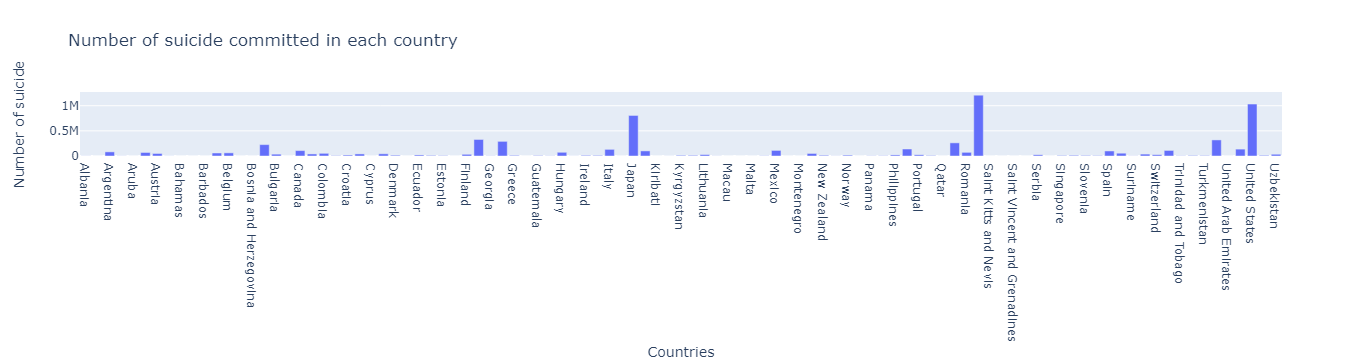

In [12]:
trace1 = go.Bar(
    y=country_suicide_series.values,
    x=country_suicide_series.index,
)

data = [trace1]
layout = go.Layout(
    title="Number of suicide committed in each country",
    xaxis={
        'title':"Countries",
    },
    yaxis={
        'title':"Number of suicide",
    }
)
figure=go.Figure(data=data,layout=layout)
py.offline.iplot(figure)

In [13]:
suicide.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [14]:
#Number of suicides genderwise
(suicide['suicides_no'][suicide['sex']=='male']).sum()


5188910

In [15]:
genderwise_suicide = suicide.pivot_table(index='sex' , aggfunc='sum')

In [16]:
genderwise_suicide['suicides_no']

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [17]:
suicide['suicides_no'].sum()

6748420

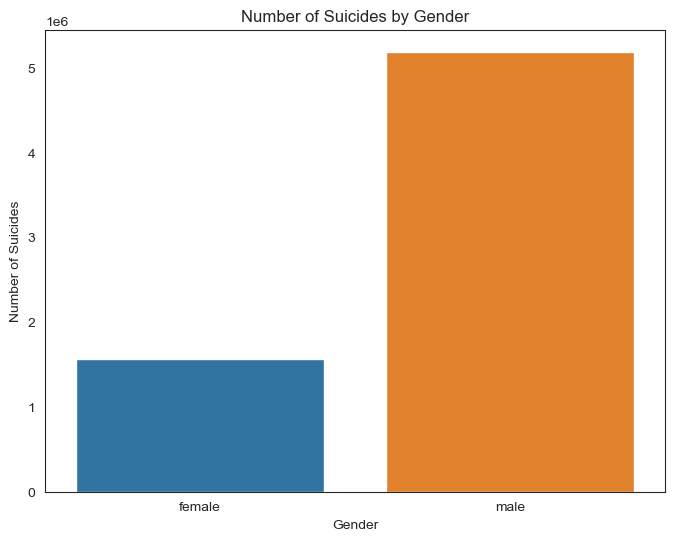

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

# Configuring the chart style
sb.set_style('white')

# Creating the bar chart
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sb.barplot(x=genderwise_suicide.index, y=genderwise_suicide.suicides_no)

# Adding title and labels to axes
plt.title('Number of Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Suicides')

# Showing the graph
plt.show()


In [19]:
#Number of suicides genderwise in each country
country_wise_gender_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'suicides_no' : suicide.suicides_no
})

In [20]:
country_wise_gender_suicide = country_wise_gender_suicide_df.pivot_table(index='country' , columns='sex' , aggfunc='sum')

In [21]:
country_wise_gender_suicide.iloc[0]

             sex   
suicides_no  female     693
             male      1277
Name: Albania, dtype: int64

In [22]:
# country_wise_gender_suicide.plot.bar(stacked = True , figsize=(30,10) , cmap='coolwarm')

In [23]:
country_wise_gender_suicide.columns = country_wise_gender_suicide.columns.droplevel()

In [24]:
country_wise_gender_suicide.female.head()

country
Albania                  693
Antigua and Barbuda        1
Argentina              18326
Armenia                  495
Aruba                     17
Name: female, dtype: int64

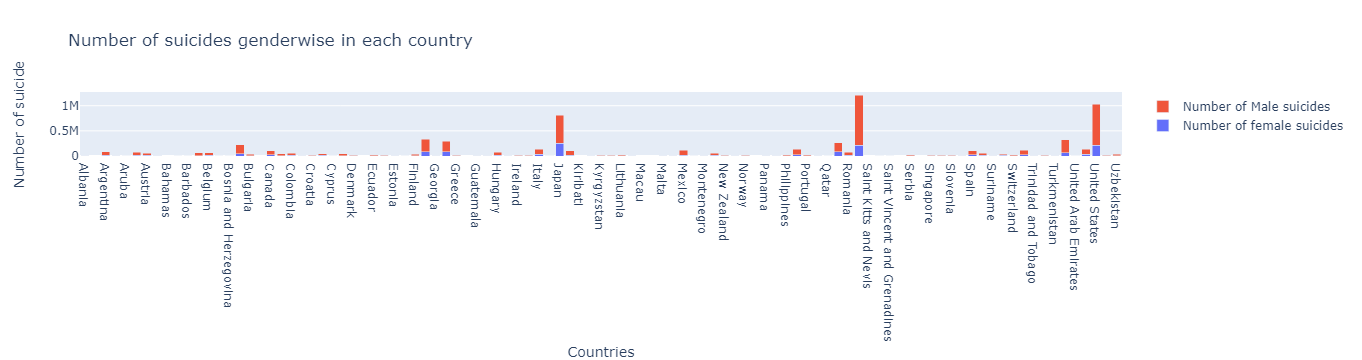

In [25]:
trace1 = go.Bar(
    x=country_wise_gender_suicide.index,
    y=country_wise_gender_suicide.female,
    name='Number of female suicides'
)
trace2 = go.Bar(
    x=country_wise_gender_suicide.index,
    y=country_wise_gender_suicide.male,
    name='Number of Male suicides'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title="Number of suicides genderwise in each country",
    xaxis={
        'title':"Countries",
    },
    yaxis={
        'title':"Number of suicide",
    }
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [26]:
#Suicides committed by various age groups
suicide.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [27]:
agewise_suicides = suicide.pivot_table(index='age' , aggfunc='sum')

In [28]:
agewise_suicides.columns

Index([' gdp_for_year ($) ', 'HDI for year', 'country', 'country-year',
       'gdp_per_capita ($)', 'generation', 'population', 'sex',
       'suicides/100k pop', 'suicides_no', 'year'],
      dtype='object')

In [29]:
agewise_suicides_df = pd.DataFrame({
    'suicides_no' : agewise_suicides['suicides_no']
},index = agewise_suicides.index)

In [30]:
agewise_suicides_df

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


<Axes: xlabel='age'>

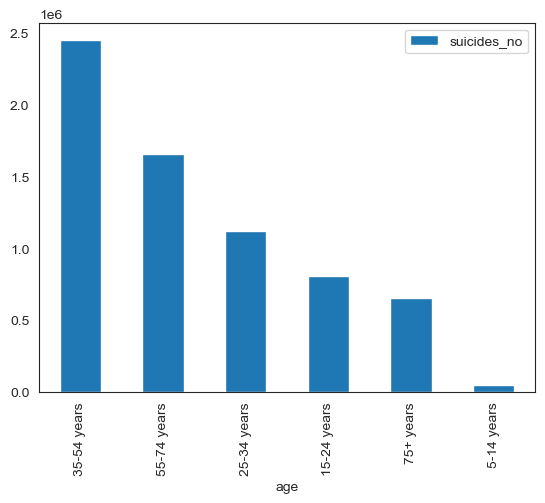

In [31]:
agewise_suicides_df.sort_values(by='suicides_no' , ascending=False).plot.bar()

In [32]:
#Suicides committed by various age groups in male and female
gender_agewise_suicide_df = pd.DataFrame({
    'sex' :suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})

In [33]:
gender_agewise_suicide = gender_agewise_suicide_df.pivot_table(index='age' , columns='sex' , aggfunc='sum')

In [34]:
gender_agewise_suicide.iloc[0]

            sex   
suicide_no  female    175437
            male      633105
Name: 15-24 years, dtype: int64

In [35]:
#gender_agewise_suicide.plot.pie(subplots=True , figsize=(30,10))

In [36]:
gender_agewise_suicide.columns = gender_agewise_suicide.columns.droplevel()

In [37]:
gender_agewise_suicide.female

age
15-24 years    175437
25-34 years    208823
35-54 years    506233
5-14 years      16997
55-74 years    430036
75+ years      221984
Name: female, dtype: int64

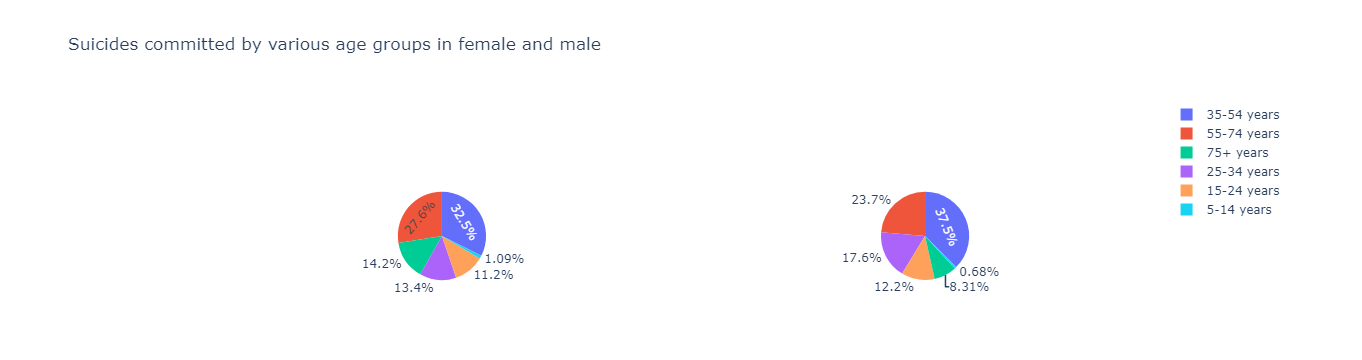

In [38]:
fig = {
    'data' : [
        {
           'labels' : gender_agewise_suicide.index,
           'values' : gender_agewise_suicide.female,
            'type': 'pie',
            'name': 'Female suicides no',
            'domain': {'x': [0, .48],
                       'y': [0, .49]}
        },
        {
           'labels' : gender_agewise_suicide.index,
           'values' : gender_agewise_suicide.male,
            'type': 'pie',
            'name': 'Male suicides no',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]}
        }  
    ],
    'layout': {'title': 'Suicides committed by various age groups in female and male'}
}

py.offline.iplot(fig)

In [39]:
#Suicides committed by various age groups in male and female in each country
country_gender_agewise_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})

In [40]:
country_gender_agewise_suicide_df.head()

,country,sex,age,suicide_no
0,Albania,male,15-24 years,21
1,Albania,male,35-54 years,16
2,Albania,female,15-24 years,14
3,Albania,male,75+ years,1
4,Albania,male,25-34 years,9


In [41]:
country_gender_agewise_suicide = country_gender_agewise_suicide_df.pivot_table(index=['country' , 'age'] , columns='sex' , aggfunc='sum')

In [42]:
country_gender_agewise_suicide.loc['Albania']

suicide_no     
sex             female male
age                        
15-24 years        253  293
25-34 years        139  288
35-54 years        173  418
5-14 years          21   40
55-74 years         68  196
75+ years           39   42

<Axes: ylabel='country,age'>

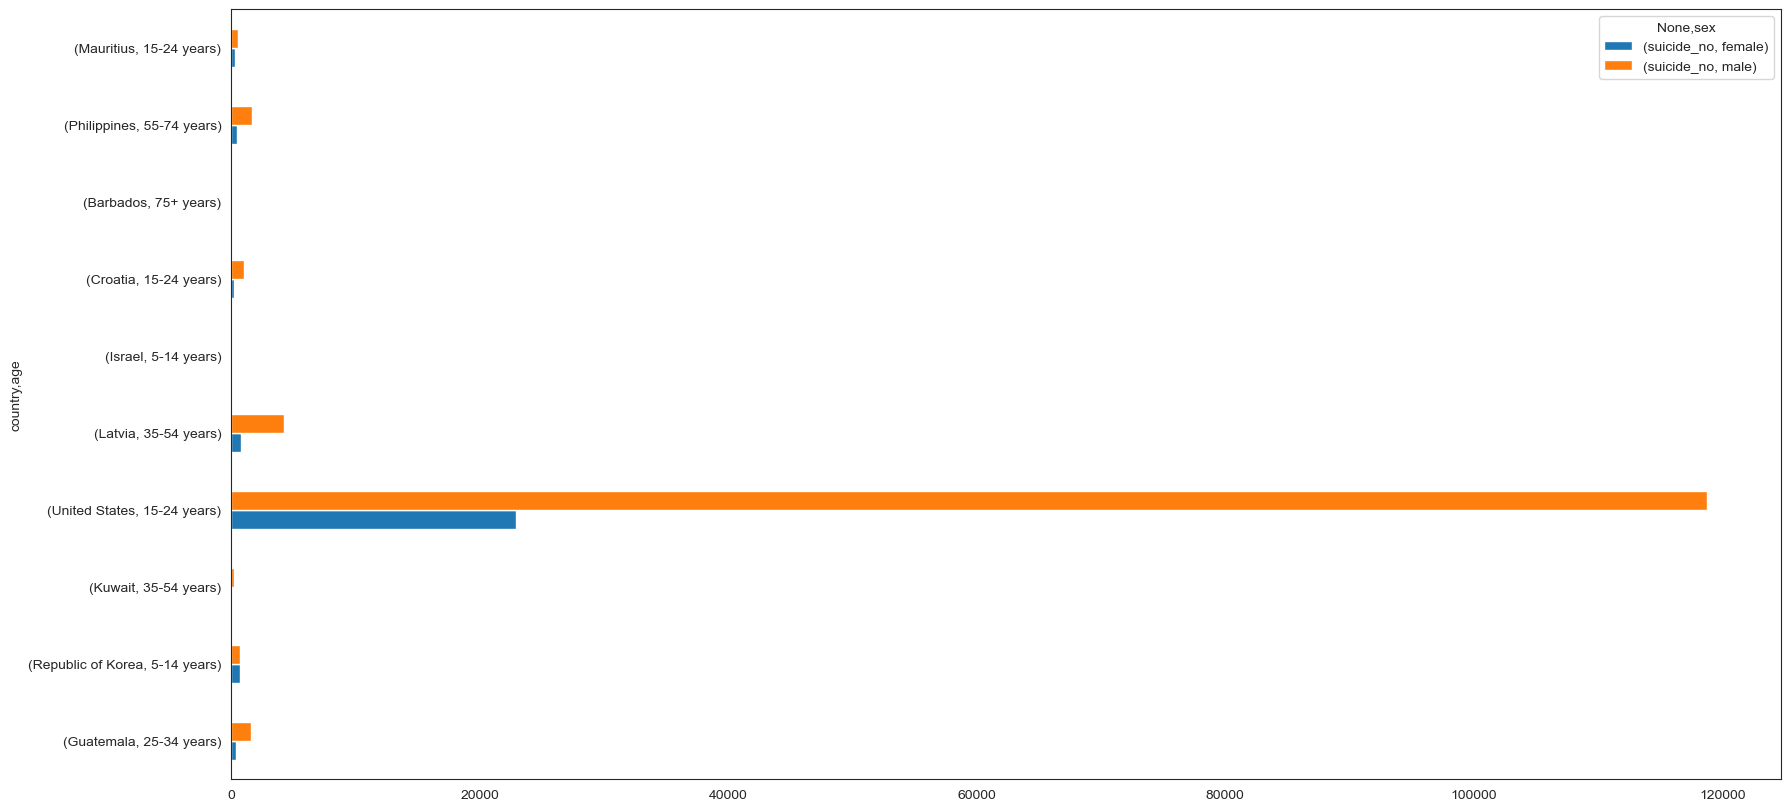

In [43]:
country_gender_agewise_suicide.sample(10).plot.barh(figsize=(20,10))

In [44]:
#Suicide rate in male and female yearly
yearly_countrywise_gender_suicide_df = pd.DataFrame({
    "year" : suicide.year,
    "sex" : suicide.sex,
    "suicides_no" : suicide.suicides_no
})

In [45]:
yearly_countrywise_gender_suicide = yearly_countrywise_gender_suicide_df.pivot_table(index='year', columns='sex',aggfunc='mean')

In [46]:
yearly_countrywise_gender_suicide.head()

suicides_no            
sex       female        male
year                        
1985  112.774306  290.222222
1986  117.541667  301.451389
1987  108.043210  283.444444
1988  112.295918  299.357143
1989  132.567308  381.035256

In [47]:
x = yearly_countrywise_gender_suicide.index

In [48]:
yearly_countrywise_gender_suicide.columns

MultiIndex([('suicides_no', 'female'),
            ('suicides_no',   'male')],
           names=[None, 'sex'])

In [49]:
yearly_countrywise_gender_suicide.columns = ['female' , 'male']

In [50]:
yearly_countrywise_gender_suicide.head()

,female,male
year,,
1985,112.774306,290.222222
1986,117.541667,301.451389
1987,108.043210,283.444444
1988,112.295918,299.357143
1989,132.567308,381.035256


In [51]:
female = yearly_countrywise_gender_suicide['female']
male = yearly_countrywise_gender_suicide['male']

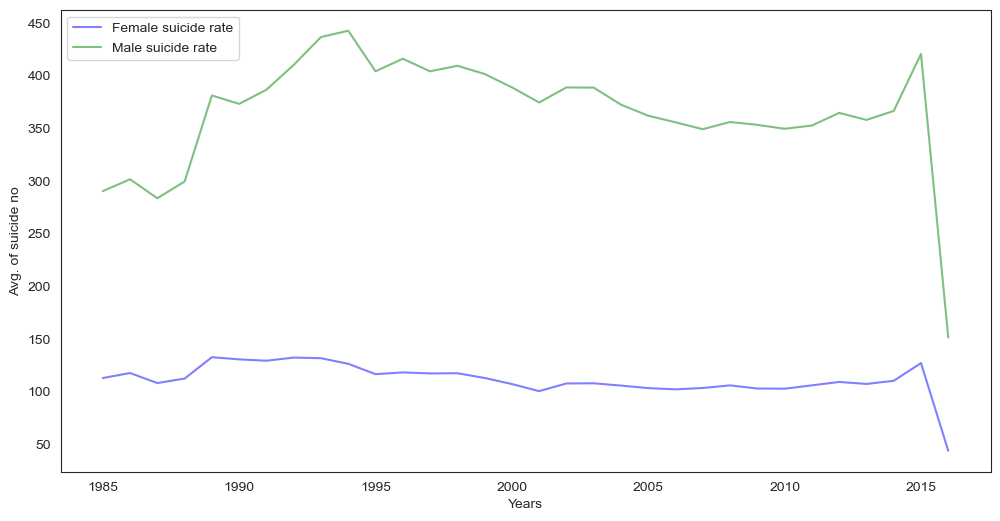

In [52]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, female, color="blue", alpha=0.5 , label='Female suicide rate')
ax.plot(x, male, color="green", alpha=0.5 , label="Male suicide rate")
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')
ax.legend()

In [53]:
#Suicide rate over the period of time in each country

country_yearwise_suicide_df  = pd.DataFrame({
    'country' : suicide.country,
    'year' : suicide.year,
    'suicides_no' : suicide.suicides_no
}) 

In [54]:
country_yearwise_suicide = country_yearwise_suicide_df.pivot_table(index='year' , columns='country' , aggfunc='mean')

In [55]:
country_yearwise_suicide.columns = country_yearwise_suicide.columns.droplevel()

In [56]:
country_yearwise_suicide.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,165.666667,NaN,NaN,155.083333,174.250000,NaN,0.083333,0.916667,...,248.500000,2.416667,NaN,NaN,NaN,NaN,425.416667,2453.833333,23.916667,NaN
1986,NaN,0.0,190.333333,NaN,NaN,170.333333,178.250000,NaN,NaN,NaN,...,233.166667,8.666667,NaN,NaN,NaN,NaN,403.250000,2574.333333,21.833333,NaN
1987,6.083333,0.0,190.500000,NaN,NaN,180.333333,172.416667,NaN,0.250000,0.750000,...,252.916667,9.916667,NaN,22.666667,837.500000,NaN,382.833333,2565.250000,21.500000,NaN
1988,5.250000,0.0,196.166667,NaN,NaN,181.000000,154.250000,NaN,NaN,1.166667,...,NaN,13.666667,NaN,22.500000,812.583333,NaN,414.250000,2532.333333,22.333333,NaN
1989,5.666667,0.0,187.250000,NaN,NaN,172.166667,158.166667,NaN,NaN,NaN,...,NaN,14.416667,NaN,21.083333,907.250000,NaN,363.416667,2518.166667,28.666667,NaN


In [57]:
country_yearwise_suicide.interpolate(axis=0 , inplace=True)

In [58]:
country_yearwise_suicide.fillna(method='bfill' , axis=0 , inplace=True)

In [59]:
country_yearwise_suicide.iloc[:,1].name

'Antigua and Barbuda'

In [60]:
len(country_yearwise_suicide.columns)

101

Text(0, 0.5, 'Avg. of suicide no')

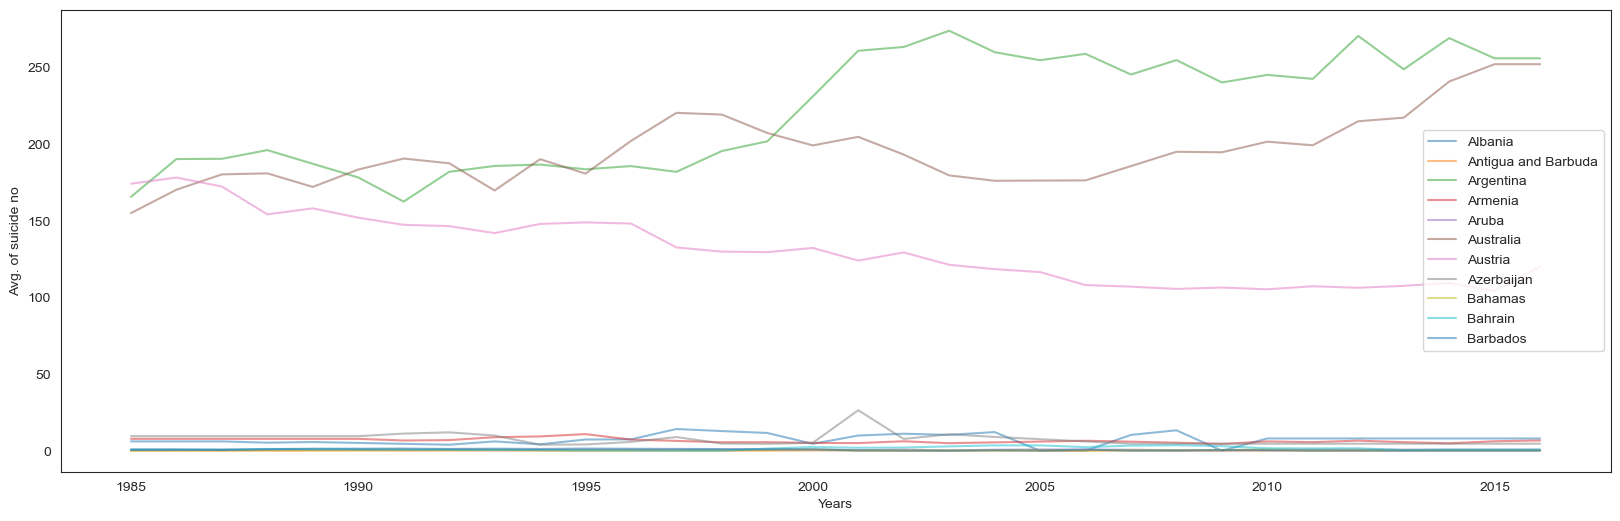

In [61]:
fig, ax = plt.subplots(figsize=(20,6))

l = len(country_yearwise_suicide.columns) 
for i in range(l - 90):
    
    ax.plot(country_yearwise_suicide.index, country_yearwise_suicide.iloc[:,i], alpha=0.5 , label=country_yearwise_suicide.iloc[:,i].name)

ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')

In [62]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [63]:
suicide.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [132]:
#GDP evalution of each country yearly basis
yearly_country_gdp_df = pd.DataFrame({
    'country' : suicide.country,
    'year' : suicide.year,
    'gdp' : suicide.iloc[:,9]
})

In [134]:
yearly_country_gdp_df = yearly_country_gdp_df.drop_duplicates()

In [136]:
yearly_country_gdp_df.head()

,country,year,gdp
0,Albania,1987,"2,156,624,900"
12,Albania,1988,"2,126,000,000"
24,Albania,1989,"2,335,124,988"
36,Albania,1992,"709,452,584"
48,Albania,1993,"1,228,071,038"


In [138]:
yearly_country_gdp_df = yearly_country_gdp_df.set_index('country')

In [143]:
yearly_country_gdp_df.head()

,year,gdp
country,,
Albania,1987,"2,156,624,900"
Albania,1988,"2,126,000,000"
Albania,1989,"2,335,124,988"
Albania,1992,"709,452,584"
Albania,1993,"1,228,071,038"


In [147]:
#Evaluation GDP of Albania country throughout the period
country_gdp = yearly_country_gdp_df[yearly_country_gdp_df.index == 'Albania']
country_gdp.head()

,year,gdp
country,,
Albania,1987,"2,156,624,900"
Albania,1988,"2,126,000,000"
Albania,1989,"2,335,124,988"
Albania,1992,"709,452,584"
Albania,1993,"1,228,071,038"


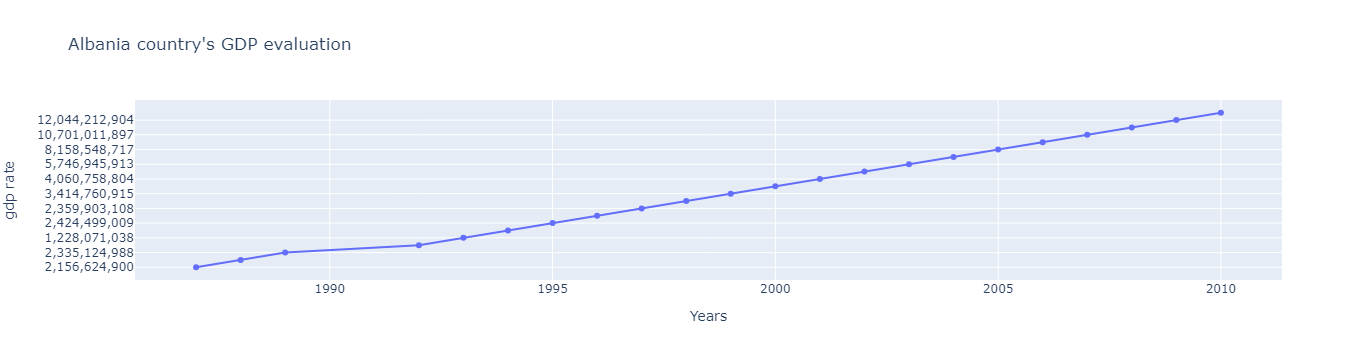

In [149]:
trace = go.Scatter(x=country_gdp.year , y=country_gdp.gdp , name=country_gdp.index[0],mode = 'lines+markers')
layout = go.Layout(
        title="Albania country's GDP evaluation",
        xaxis={
                'title':"Years",
              },
        yaxis={
                'title':"gdp rate",
              }
        )
data = [trace]
fig = go.Figure(data=data , layout=layout)
py.offline.iplot(fig)

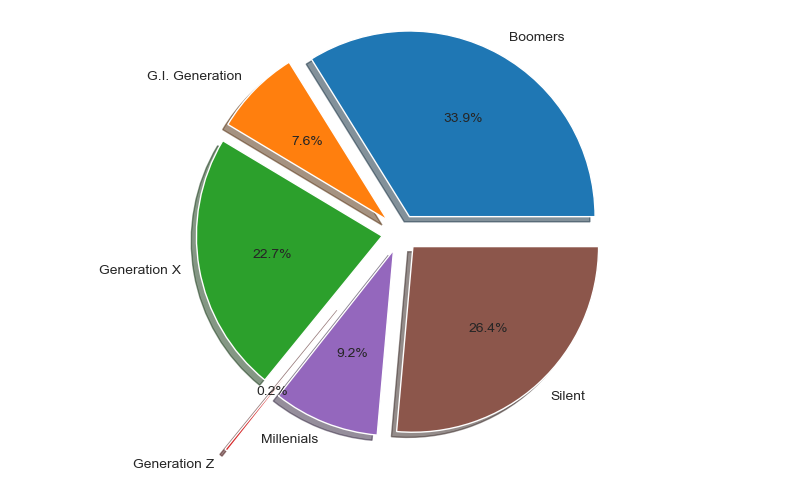

In [151]:
#Generation evaluation

gen_sui = suicide.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')
plt.show()

In [153]:
#Pairplot through age group

suide_pairplot = suicide.fillna(method='bfill')
suide_pairplot.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent


C:\Users\marcs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



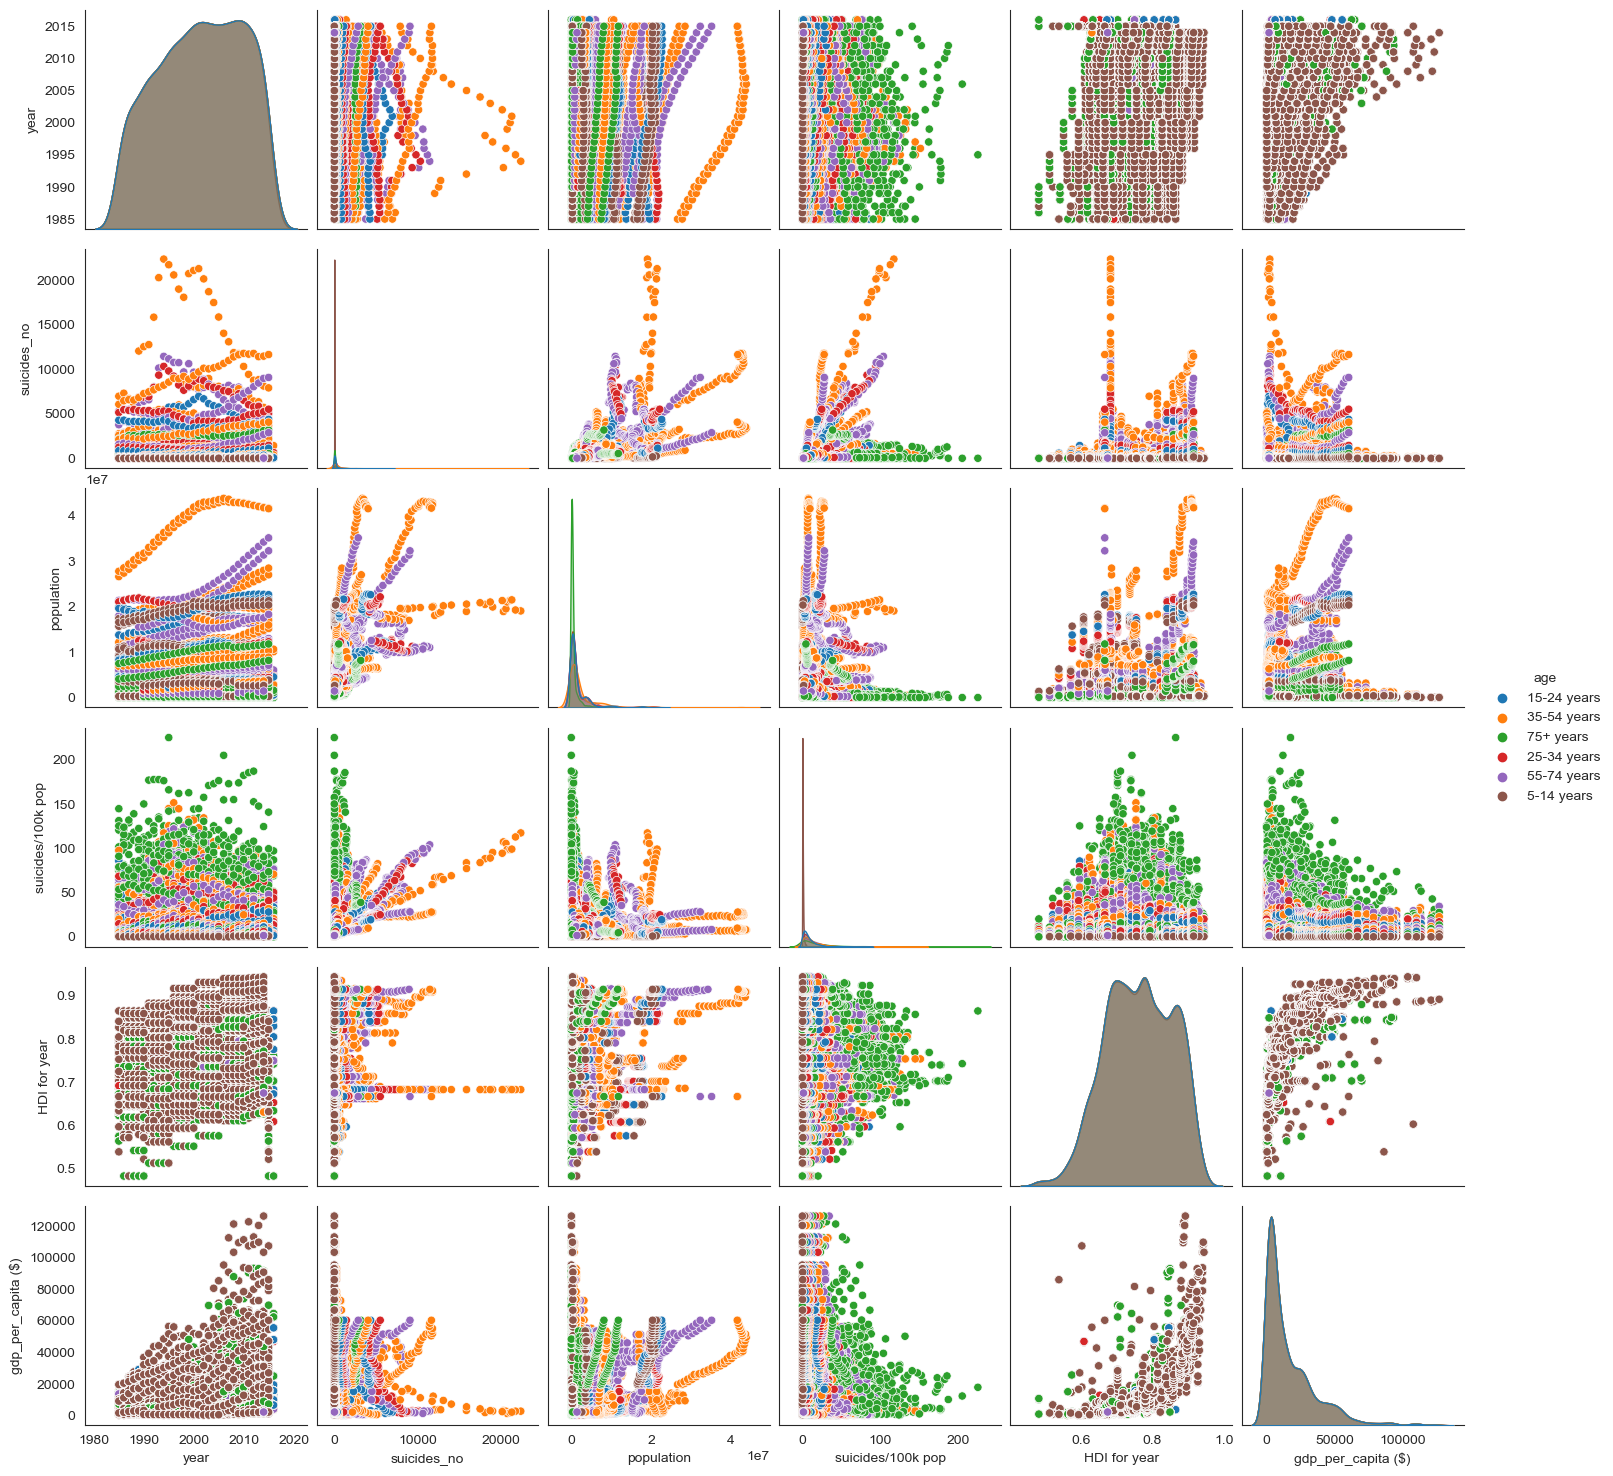

In [155]:
sb.pairplot(suide_pairplot , hue='age')

C:\Users\marcs\AppData\Local\Temp\ipykernel_8064\2398769419.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




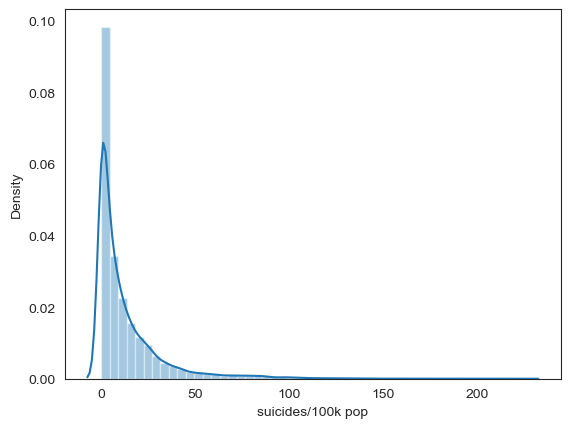

In [157]:
sb.distplot(suicide.iloc[:,6])
plt.show()